# Model Training Artifacts

This notebook will extract the model training artifacts from Hugging Face and save them to a local directory.

In [1]:
from huggingface_hub import hf_hub_download
import pandas as pd

models = [
    "keanteng/bert-large-raw-climate-sentiment-wqf7007",
    "keanteng/bert-base-generalized-climate-sentiment-wqf7007",
    "keanteng/bert-base-raw-climate-sentiment-wqf7007",
    "keanteng/bert-base-clean-climate-sentiment-wqf7007"
]

## Model Performance Summary

In [9]:
# download model performance
for model in models:
    # Extract model name from the repo_id (everything after the last '/')
    model_name = model.split('/')[-1]
    
    # Download the file
    filename = hf_hub_download(
        repo_id=model, 
        filename="results/performance_summary.csv", 
        local_dir="../artifact"
    )
    
    # Read the CSV and save with model name appended
    df = pd.read_csv(filename)
    new_filename = f"../artifact/performance_summary_{model_name}.csv"
    df.to_csv(new_filename, index=False)
    
    print(f"Downloaded and saved: {new_filename}")
    

Downloaded and saved: ../artifact/performance_summary_bert-large-raw-climate-sentiment-wqf7007.csv


performance_summary.csv:   0%|          | 0.00/109 [00:00<?, ?B/s]

Downloaded and saved: ../artifact/performance_summary_bert-base-generalized-climate-sentiment-wqf7007.csv


performance_summary.csv:   0%|          | 0.00/101 [00:00<?, ?B/s]

Downloaded and saved: ../artifact/performance_summary_bert-base-raw-climate-sentiment-wqf7007.csv


performance_summary.csv:   0%|          | 0.00/103 [00:00<?, ?B/s]

Downloaded and saved: ../artifact/performance_summary_bert-base-clean-climate-sentiment-wqf7007.csv


In [12]:
!rmdir /s /q "..\artifact\results" 2>nul
!rmdir /s /q "..\artifact\.cache" 2>nul

In [13]:
import pandas as pd
import glob
import os

# Load and merge all performance summary files
def merge_performance_summaries():
    # Find all performance summary files in the artifact folder
    summary_files = glob.glob("../artifact/performance_summary_*.csv")
    
    if not summary_files:
        print("No performance summary files found in ../artifact/ folder")
        return None
    
    all_data = []
    
    for file_path in summary_files:
        # Extract model name from filename
        filename = os.path.basename(file_path)
        model_name = filename.replace('performance_summary_', '').replace('.csv', '')
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Add model name column
        df['Model_Name'] = model_name
        
        # Reorder columns to put Model_Name first
        columns = ['Model_Name'] + [col for col in df.columns if col != 'Model_Name']
        df = df[columns]
        
        all_data.append(df)
        print(f"Loaded: {filename}")
    
    # Concatenate all dataframes
    merged_df = pd.concat(all_data, ignore_index=True)
    
    # Save the merged results
    output_file = "../artifact/consolidated_performance_summary.csv"
    merged_df.to_csv(output_file, index=False)
    
    print(f"\nMerged data saved to: {output_file}")
    
    return merged_df

# Execute the merge and display the results
consolidated_df = merge_performance_summaries()

if consolidated_df is not None:
    print("\nConsolidated Performance Summary:")
    print("=" * 80)
    print(consolidated_df.to_string(index=False))
    
    # Display as a nicely formatted table
    print("\n\nFormatted Table:")
    print("=" * 120)
    
    # Format numeric columns to 4 decimal places for better readability
    numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
    for col in numeric_cols:
        if col in consolidated_df.columns:
            consolidated_df[col] = consolidated_df[col].round(4)
    
    print(consolidated_df.to_string(index=False, float_format='%.4f'))

Loaded: performance_summary_bert-base-clean-climate-sentiment-wqf7007.csv
Loaded: performance_summary_bert-base-generalized-climate-sentiment-wqf7007.csv
Loaded: performance_summary_bert-base-raw-climate-sentiment-wqf7007.csv
Loaded: performance_summary_bert-large-raw-climate-sentiment-wqf7007.csv

Merged data saved to: ../artifact/consolidated_performance_summary.csv

Consolidated Performance Summary:
                                     Model_Name                    Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
      bert-base-clean-climate-sentiment-wqf7007       climate_data_clean    0.7064     0.7016  0.7064    0.7030   0.7698
bert-base-generalized-climate-sentiment-wqf7007 climate_data_generalized    0.7106     0.7274  0.7106    0.7132   0.7928
        bert-base-raw-climate-sentiment-wqf7007         climate_data_raw    0.7886     0.7847  0.7886    0.7853   0.8307
       bert-large-raw-climate-sentiment-wqf7007         climate_data_raw    0.7970     0.7923  0.7970    0.791

## AUC ROC

In [18]:
# download model performance
auc_names = [
    'bert_large_auc.json',
    'bert_generalized_auc.json',
    'bert_raw_auc.json',
    'bert_clean_auc.json'
]

for i, model in enumerate(models):
    # Extract model name from the repo_id (everything after the last '/')
    model_name = model.split('/')[-1]
    
    # Download the file
    filename = hf_hub_download(
        repo_id=model, 
        filename=f"results/{auc_names[i]}", 
        local_dir="../artifact"
    )
    
    print(f"Downloaded and saved: {filename}")

bert_large_auc.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

Downloaded and saved: ..\artifact\results\bert_large_auc.json


bert_generalized_auc.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Downloaded and saved: ..\artifact\results\bert_generalized_auc.json


bert_raw_auc.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

Downloaded and saved: ..\artifact\results\bert_raw_auc.json


bert_clean_auc.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

Downloaded and saved: ..\artifact\results\bert_clean_auc.json


In [20]:
!move "..\artifact\results\*.json" "..\artifact\"

c:\Users\Khor Kean Teng\Downloads\MDS Git Sem 2\wqf7007-project\artifact\results\bert_clean_auc.json
c:\Users\Khor Kean Teng\Downloads\MDS Git Sem 2\wqf7007-project\artifact\results\bert_generalized_auc.json
c:\Users\Khor Kean Teng\Downloads\MDS Git Sem 2\wqf7007-project\artifact\results\bert_large_auc.json
c:\Users\Khor Kean Teng\Downloads\MDS Git Sem 2\wqf7007-project\artifact\results\bert_raw_auc.json
        4 file(s) moved.


In [21]:
!rmdir /s /q "..\artifact\results" 2>nul
!rmdir /s /q "..\artifact\.cache" 2>nul

Loaded AUC data for: BERT Base Clean
Loaded AUC data for: BERT Base Generalized
Loaded AUC data for: BERT Large
Loaded AUC data for: BERT Base Raw


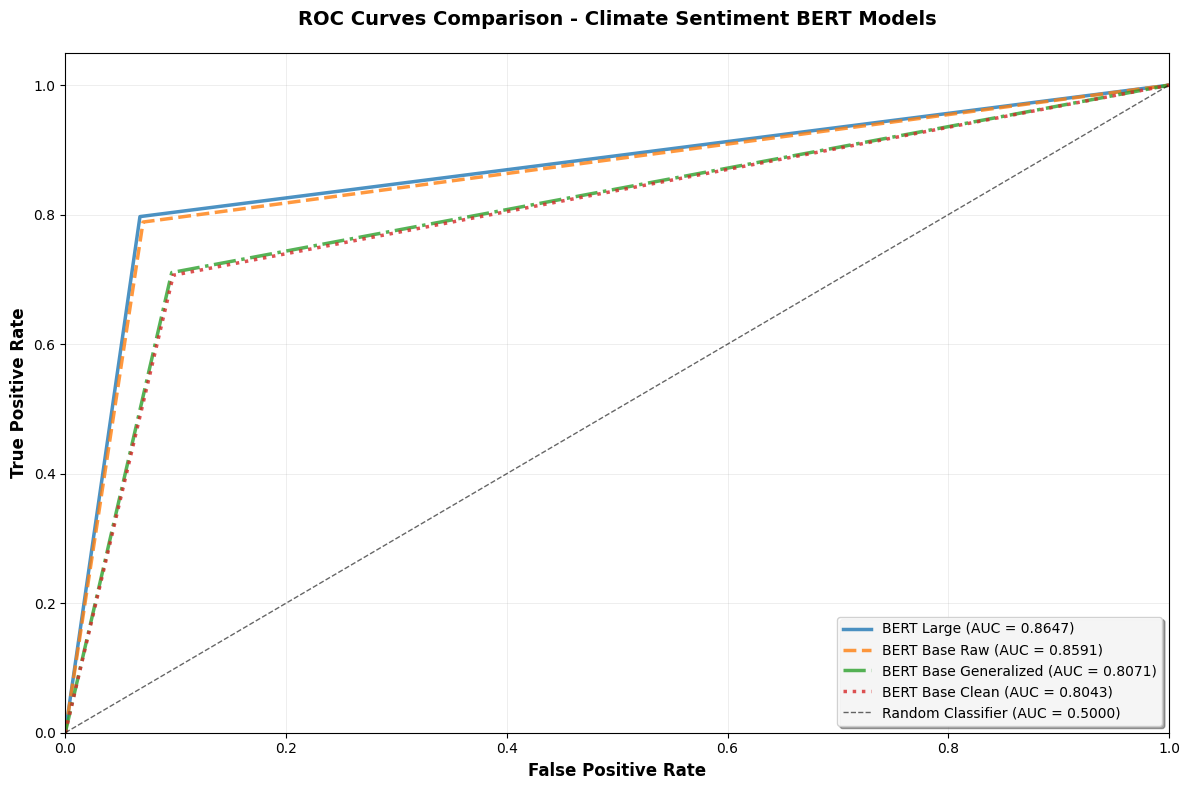

ROC curve plot saved as: ../artifact/consolidated_roc_comparison.png

Model Performance Summary (sorted by AUC):
BERT Large               : AUC = 0.8647
BERT Base Raw            : AUC = 0.8591
BERT Base Generalized    : AUC = 0.8071
BERT Base Clean          : AUC = 0.8043


In [24]:
import json
import matplotlib.pyplot as plt
import glob
import os

# Load all AUC data
def load_all_auc_data():
    auc_files = glob.glob('../artifact/*_auc.json')
    all_data = {}
    
    # Define a mapping for cleaner model names
    name_mapping = {
        'bert_large': 'BERT Large',
        'bert_generalized': 'BERT Base Generalized',
        'bert_raw': 'BERT Base Raw', 
        'bert_clean': 'BERT Base Clean'
    }
    
    for file_path in auc_files:
        # Extract model type from filename
        filename = os.path.basename(file_path)
        model_type = filename.replace('_auc.json', '')
        
        # Get clean name from mapping, fallback to original if not found
        clean_name = name_mapping.get(model_type, model_type.replace('_', ' ').title())
        
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                
            # Extract the first model's data (assuming one model per file)
            for model_name, auc_info in data.items():
                all_data[clean_name] = auc_info
                break  # Take only the first entry
                
            print(f"Loaded AUC data for: {clean_name}")
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return all_data

# Plot consolidated ROC curves with improved styling
def plot_roc_curves():
    plt.figure(figsize=(12, 8))
    
    all_auc_data = load_all_auc_data()
    
    if not all_auc_data:
        print("No AUC data found to plot")
        return
    
    # Define colors and line styles for better distinction
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    line_styles = ['-', '--', '-.', ':', '-']
    
    # Sort models by AUC score for better legend ordering
    sorted_models = sorted(all_auc_data.items(), key=lambda x: x[1]['auc'], reverse=True)
    
    for i, (model_name, auc_info) in enumerate(sorted_models):
        plt.plot(auc_info['fpr'], auc_info['tpr'],
                 label=f'{model_name} (AUC = {auc_info["auc"]:.4f})',
                 color=colors[i % len(colors)], 
                 linestyle=line_styles[i % len(line_styles)],
                 linewidth=2.5,
                 alpha=0.8)
    
    # Plot diagonal line for random classifier
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.6, label='Random Classifier (AUC = 0.5000)')
    
    # Enhance plot styling
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title('ROC Curves Comparison - Climate Sentiment BERT Models', fontsize=14, fontweight='bold', pad=20)
    
    # Improve legend
    plt.legend(loc="lower right", fontsize=10, frameon=True, 
               fancybox=True, shadow=True, framealpha=0.9)
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Add some styling touches
    plt.tight_layout()
    
    # Save the plot with better path
    save_path = '../artifact/consolidated_roc_comparison.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    
    plt.show()
    
    print(f"ROC curve plot saved as: {save_path}")
    
    # Print summary of AUC scores
    print("\nModel Performance Summary (sorted by AUC):")
    print("=" * 50)
    for model_name, auc_info in sorted_models:
        print(f"{model_name:<25}: AUC = {auc_info['auc']:.4f}")

# Execute the plotting
plot_roc_curves()